In [428]:
import matplotlib as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [505]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [507]:
df.value_counts('smoking_status')

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
dtype: int64

In [348]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [349]:
df.value_counts('gender')

gender
Female    2994
Male      2115
Other        1
dtype: int64

In [350]:
corr = df.corr()
corr

/var/folders/t1/4gyh066d73q_htktlzfyfhrr0000gn/T/ipykernel_10285/2438084875.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


<AxesSubplot: >

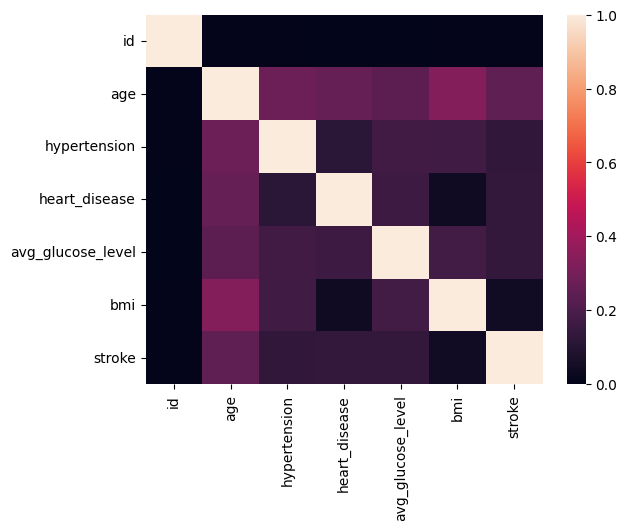

In [244]:
sns.heatmap(corr,)

In [245]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [430]:
male_mean = df[df['gender'] == 'Male']['bmi'].mean()
female_mean = df[df['gender'] == 'Female']['bmi'].mean()

print(male_mean)
print(female_mean)

28.64793635007459
29.065757680358992


In [327]:
df.index

RangeIndex(start=0, stop=5110, step=1)

In [431]:
for i in df.index:
    if df.loc[i, 'gender'] == 'Male' and np.isnan(df.loc[i, 'bmi']):
        df.loc[i, 'bmi'] = male_mean
    elif df.loc[i, 'gender'] == 'Female' and np.isnan(df.loc[i, 'bmi']):
        df.loc[i, 'bmi'] = female_mean

In [353]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.065758,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,29.065758,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [432]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<AxesSubplot: xlabel='gender', ylabel='count'>

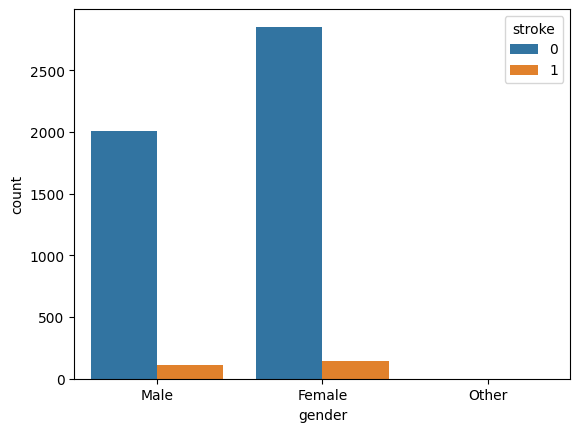

In [355]:
sns.countplot(x='gender',hue='stroke', data=df)

In [433]:
df = df.drop(df[df['gender'] == 'Other'].index)

<AxesSubplot: xlabel='gender', ylabel='count'>

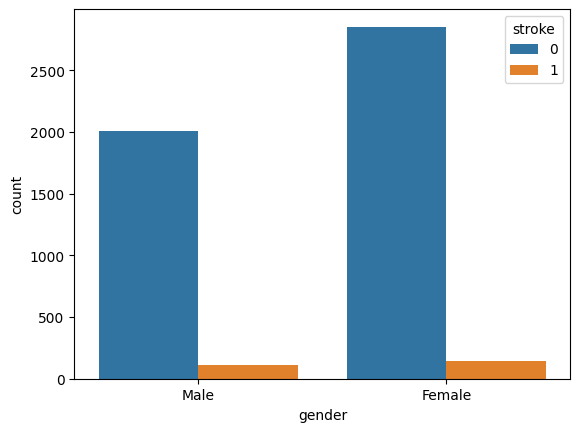

In [252]:
sns.countplot(x='gender',hue='stroke', data=df)

<AxesSubplot: xlabel='age', ylabel='Density'>

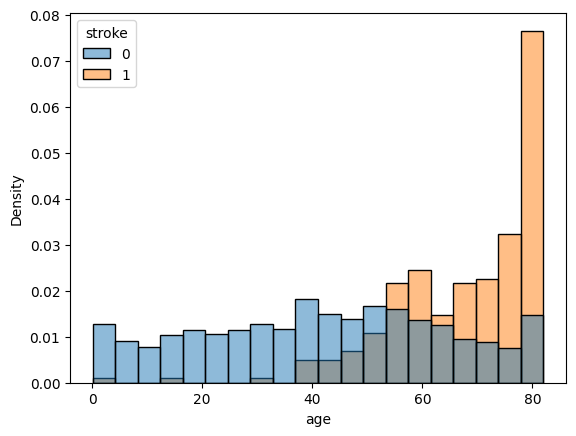

In [253]:
sns.histplot(x='age', hue='stroke', stat='density',data=df,common_norm=False)

<AxesSubplot: xlabel='smoking_status', ylabel='count'>

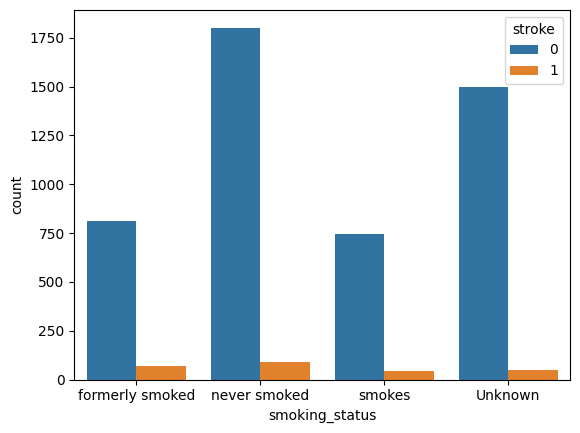

In [254]:
sns.countplot(x='smoking_status',hue='stroke', data=df)

In [434]:
df.reset_index(drop=True, inplace=True)

In [256]:
df.index

RangeIndex(start=0, stop=5109, step=1)

In [435]:
for i in df.index:
    if df.iloc[i]['smoking_status'] == 'never smoked':
        df.loc[i, 'smoking_status'] = int(0)
    elif df.iloc[i]['smoking_status'] == 'formerly smoked':
        df.loc[i, 'smoking_status'] = int(1)
    elif df.iloc[i]['smoking_status'] == 'smokes':
        df.loc[i, 'smoking_status'] = int(2)

In [436]:
df = df.drop(df[df['smoking_status'] == 'Unknown'].index)

In [437]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.065758,0,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,0,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,2,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5101,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.700000,0,0
5104,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,29.065758,0,0
5105,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,0,0
5106,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,0,0


<AxesSubplot: xlabel='smoking_status', ylabel='count'>

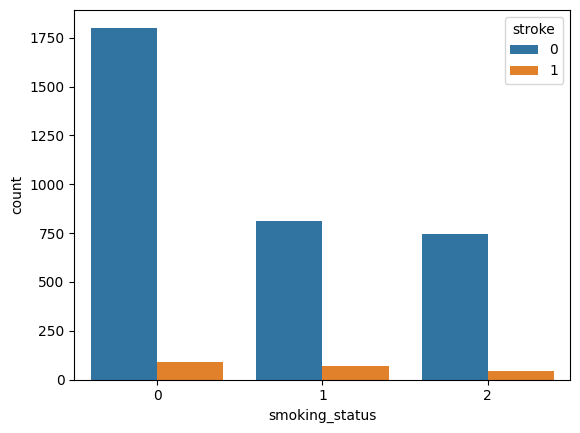

In [260]:
sns.countplot(x='smoking_status',hue='stroke', data=df)

<AxesSubplot: xlabel='smoking_status', ylabel='Density'>

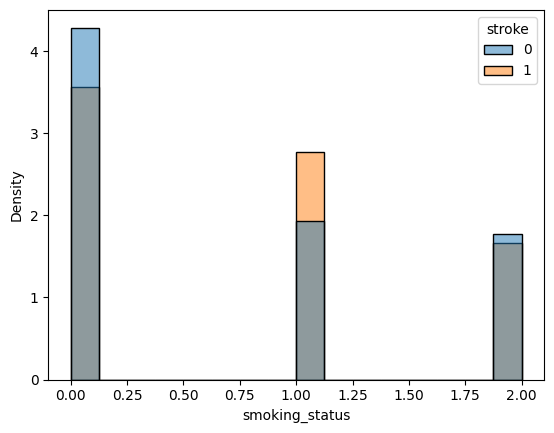

In [261]:
sns.histplot(x='smoking_status', hue='stroke', stat='density',data=df,common_norm=False)

<AxesSubplot: xlabel='avg_glucose_level', ylabel='Density'>

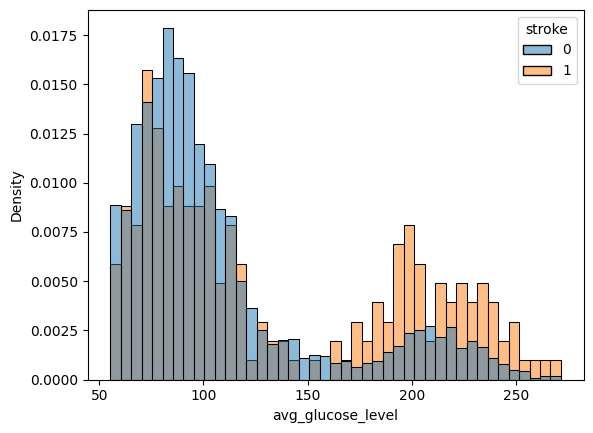

In [262]:
sns.histplot(x='avg_glucose_level', hue='stroke', stat='density',data=df,common_norm=False)

<AxesSubplot: xlabel='bmi', ylabel='Density'>

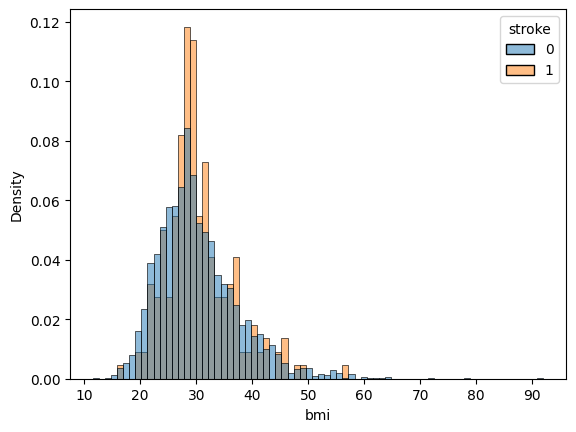

In [264]:
sns.histplot(x='bmi', hue='stroke', stat='density',data=df,common_norm=False)

<AxesSubplot: xlabel='Residence_type', ylabel='count'>

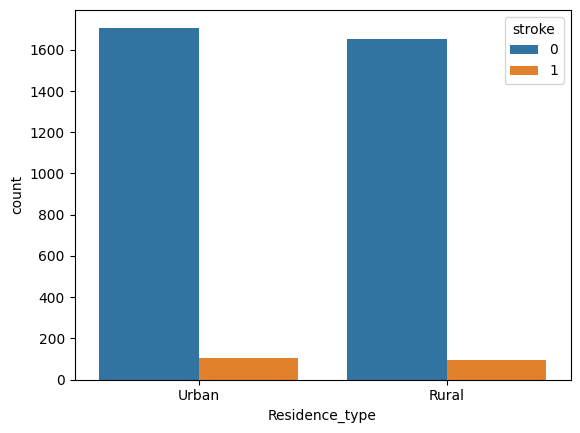

In [265]:
sns.countplot(x='Residence_type',hue='stroke', data=df)

<AxesSubplot: xlabel='work_type', ylabel='count'>

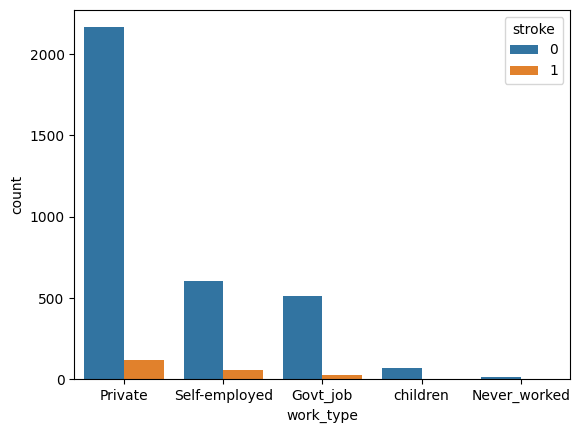

In [266]:
sns.countplot(x='work_type',hue='stroke', data=df)

In [438]:
df.reset_index(drop=True, inplace=True)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.065758,0,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,0,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,2,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3560,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.700000,0,0
3561,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,29.065758,0,0
3562,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,0,0
3563,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,0,0


In [439]:
df = pd.get_dummies(df, columns=['work_type'])

In [440]:
df

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046,Male,67.0,0,1,Yes,Urban,228.69,36.600000,1,1,0,0,1,0,0
1,51676,Female,61.0,0,0,Yes,Rural,202.21,29.065758,0,1,0,0,0,1,0
2,31112,Male,80.0,0,1,Yes,Rural,105.92,32.500000,0,1,0,0,1,0,0
3,60182,Female,49.0,0,0,Yes,Urban,171.23,34.400000,2,1,0,0,1,0,0
4,1665,Female,79.0,1,0,Yes,Rural,174.12,24.000000,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3560,45010,Female,57.0,0,0,Yes,Rural,77.93,21.700000,0,0,0,0,1,0,0
3561,18234,Female,80.0,1,0,Yes,Urban,83.75,29.065758,0,0,0,0,1,0,0
3562,44873,Female,81.0,0,0,Yes,Urban,125.20,40.000000,0,0,0,0,0,1,0
3563,19723,Female,35.0,0,0,Yes,Rural,82.99,30.600000,0,0,0,0,0,1,0


In [441]:
df.reset_index(drop=True, inplace=True)

In [442]:
for i in df.index:
    if df.iloc[i]['Residence_type'] == 'Urban':
        df.loc[i, 'Residence_type'] = int(1)
    elif df.iloc[i]['Residence_type'] == 'Rural':
        df.loc[i, 'Residence_type'] = int(0)
    
    if df.iloc[i]['ever_married'] == 'Yes':
        df.loc[i, 'ever_married'] = int(1)
    elif df.iloc[i]['ever_married'] == 'No':
        df.loc[i, 'ever_married'] = int(0)

In [366]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046,Male,67.0,0,1,1,1,228.69,36.600000,1,1,0,0,1,0,0
1,51676,Female,61.0,0,0,1,0,202.21,29.065758,0,1,0,0,0,1,0
2,31112,Male,80.0,0,1,1,0,105.92,32.500000,0,1,0,0,1,0,0
3,60182,Female,49.0,0,0,1,1,171.23,34.400000,2,1,0,0,1,0,0
4,1665,Female,79.0,1,0,1,0,174.12,24.000000,0,1,0,0,0,1,0


In [443]:
df

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046,Male,67.0,0,1,1,1,228.69,36.600000,1,1,0,0,1,0,0
1,51676,Female,61.0,0,0,1,0,202.21,29.065758,0,1,0,0,0,1,0
2,31112,Male,80.0,0,1,1,0,105.92,32.500000,0,1,0,0,1,0,0
3,60182,Female,49.0,0,0,1,1,171.23,34.400000,2,1,0,0,1,0,0
4,1665,Female,79.0,1,0,1,0,174.12,24.000000,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3560,45010,Female,57.0,0,0,1,0,77.93,21.700000,0,0,0,0,1,0,0
3561,18234,Female,80.0,1,0,1,1,83.75,29.065758,0,0,0,0,1,0,0
3562,44873,Female,81.0,0,0,1,1,125.20,40.000000,0,0,0,0,0,1,0
3563,19723,Female,35.0,0,0,1,0,82.99,30.600000,0,0,0,0,0,1,0


In [444]:
Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['avg_glucose_level'] < (Q1 - 1.5 * IQR)) |(df['avg_glucose_level'] > (Q3 + 1.5 * IQR)))]

In [445]:
df

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
2,31112,Male,80.0,0,1,1,0,105.92,32.500000,0,1,0,0,1,0,0
3,60182,Female,49.0,0,0,1,1,171.23,34.400000,2,1,0,0,1,0,0
4,1665,Female,79.0,1,0,1,0,174.12,24.000000,0,1,0,0,0,1,0
6,53882,Male,74.0,1,1,1,0,70.09,27.400000,0,1,0,0,1,0,0
7,10434,Female,69.0,0,0,0,1,94.39,22.800000,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3560,45010,Female,57.0,0,0,1,0,77.93,21.700000,0,0,0,0,1,0,0
3561,18234,Female,80.0,1,0,1,1,83.75,29.065758,0,0,0,0,1,0,0
3562,44873,Female,81.0,0,0,1,1,125.20,40.000000,0,0,0,0,0,1,0
3563,19723,Female,35.0,0,0,1,0,82.99,30.600000,0,0,0,0,0,1,0


In [446]:
Q1_bim = df['bmi'].quantile(0.25)
Q3_bim = df['bmi'].quantile(0.75)
IQR_bim = Q3_bim - Q1_bim
df = df[~((df['bmi'] < (Q1_bim - 1.5 * IQR_bim)) |(df['bmi'] > (Q3_bim + 1.5 * IQR_bim)))]
df

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
2,31112,Male,80.0,0,1,1,0,105.92,32.500000,0,1,0,0,1,0,0
3,60182,Female,49.0,0,0,1,1,171.23,34.400000,2,1,0,0,1,0,0
4,1665,Female,79.0,1,0,1,0,174.12,24.000000,0,1,0,0,0,1,0
6,53882,Male,74.0,1,1,1,0,70.09,27.400000,0,1,0,0,1,0,0
7,10434,Female,69.0,0,0,0,1,94.39,22.800000,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3560,45010,Female,57.0,0,0,1,0,77.93,21.700000,0,0,0,0,1,0,0
3561,18234,Female,80.0,1,0,1,1,83.75,29.065758,0,0,0,0,1,0,0
3562,44873,Female,81.0,0,0,1,1,125.20,40.000000,0,0,0,0,0,1,0
3563,19723,Female,35.0,0,0,1,0,82.99,30.600000,0,0,0,0,0,1,0


In [447]:
Q1_age = df['age'].quantile(0.25)
Q3_age = df['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
df = df[~((df['age'] < (Q1_age - 1.5 * IQR_age)) |(df['age'] > (Q3_age + 1.5 * IQR_age)))]
df

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
2,31112,Male,80.0,0,1,1,0,105.92,32.500000,0,1,0,0,1,0,0
3,60182,Female,49.0,0,0,1,1,171.23,34.400000,2,1,0,0,1,0,0
4,1665,Female,79.0,1,0,1,0,174.12,24.000000,0,1,0,0,0,1,0
6,53882,Male,74.0,1,1,1,0,70.09,27.400000,0,1,0,0,1,0,0
7,10434,Female,69.0,0,0,0,1,94.39,22.800000,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3560,45010,Female,57.0,0,0,1,0,77.93,21.700000,0,0,0,0,1,0,0
3561,18234,Female,80.0,1,0,1,1,83.75,29.065758,0,0,0,0,1,0,0
3562,44873,Female,81.0,0,0,1,1,125.20,40.000000,0,0,0,0,0,1,0
3563,19723,Female,35.0,0,0,1,0,82.99,30.600000,0,0,0,0,0,1,0


In [448]:
df.reset_index(drop=True, inplace=True)
df

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,31112,Male,80.0,0,1,1,0,105.92,32.500000,0,1,0,0,1,0,0
1,60182,Female,49.0,0,0,1,1,171.23,34.400000,2,1,0,0,1,0,0
2,1665,Female,79.0,1,0,1,0,174.12,24.000000,0,1,0,0,0,1,0
3,53882,Male,74.0,1,1,1,0,70.09,27.400000,0,1,0,0,1,0,0
4,10434,Female,69.0,0,0,0,1,94.39,22.800000,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2970,45010,Female,57.0,0,0,1,0,77.93,21.700000,0,0,0,0,1,0,0
2971,18234,Female,80.0,1,0,1,1,83.75,29.065758,0,0,0,0,1,0,0
2972,44873,Female,81.0,0,0,1,1,125.20,40.000000,0,0,0,0,0,1,0
2973,19723,Female,35.0,0,0,1,0,82.99,30.600000,0,0,0,0,0,1,0


In [449]:
for i in df.index:
    if df.iloc[i]['gender'] == 'Male':
        df.loc[i, 'gender'] = int(1)
    elif df.iloc[i]['gender'] == 'Female':
        df.loc[i, 'gender'] = int(0)

In [450]:
X = df.drop("stroke", axis=1)
y = df["stroke"]

In [377]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [451]:
model_df = pd.DataFrame(columns=["Model Name","Accuracy Score"])

In [452]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

In [453]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [454]:
predictions_dtc = dtc.predict(X_test)
score = accuracy_score(y_test, predictions_dtc)
print(score)
new_row = {"Model Name":"Decision Tree Classifier", "Accuracy Score":score}
model_df = model_df.append(new_row, ignore_index=True)

0.9195519348268839


/var/folders/t1/4gyh066d73q_htktlzfyfhrr0000gn/T/ipykernel_10285/2997704201.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_df = model_df.append(new_row, ignore_index=True)


In [455]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predictions_rfc = rfc.predict(X_test)
score = accuracy_score(y_test, predictions_rfc)
print(score)
new_row = {"Model Name":"Random Forest Classifier", "Accuracy Score":score}
model_df = model_df.append(new_row, ignore_index=True)

0.960285132382892


/var/folders/t1/4gyh066d73q_htktlzfyfhrr0000gn/T/ipykernel_10285/1724031506.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_df = model_df.append(new_row, ignore_index=True)


In [456]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
predictions_knc = knc.predict(X_test)
score = accuracy_score(y_test, predictions_knc)
print(score)

0.9613034623217923


In [457]:
new_row = {"Model Name":"KNeighbors Classifier", "Accuracy Score":score}
model_df = model_df.append(new_row, ignore_index=True)

/var/folders/t1/4gyh066d73q_htktlzfyfhrr0000gn/T/ipykernel_10285/2029265224.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_df = model_df.append(new_row, ignore_index=True)


In [458]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions_lr = lr.predict(X_test)
score = accuracy_score(y_test, predictions_lr)
print(score)

0.9592668024439919


In [459]:
new_row = {"Model Name":"Logistic Regression", "Accuracy Score":score}
model_df = model_df.append(new_row, ignore_index=True)

/var/folders/t1/4gyh066d73q_htktlzfyfhrr0000gn/T/ipykernel_10285/2145065139.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_df = model_df.append(new_row, ignore_index=True)


In [460]:
model_df = model_df.sort_values("Accuracy Score", ascending=False)
model_df

,Model Name,Accuracy Score
2,KNeighbors Classifier,0.961303
1,Random Forest Classifier,0.960285
3,Logistic Regression,0.959267
0,Decision Tree Classifier,0.919552


In [461]:
new_row = {"Model Name":"XGBoost Classifier", "Accuracy Score":0.898763}
model_df = model_df.append(new_row, ignore_index=True)

/var/folders/t1/4gyh066d73q_htktlzfyfhrr0000gn/T/ipykernel_10285/62699078.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_df = model_df.append(new_row, ignore_index=True)


In [462]:
model_df

,Model Name,Accuracy Score
0,KNeighbors Classifier,0.961303
1,Random Forest Classifier,0.960285
2,Logistic Regression,0.959267
3,Decision Tree Classifier,0.919552
4,XGBoost Classifier,0.898763


<AxesSubplot: xlabel='Accuracy Score', ylabel='Model Name'>

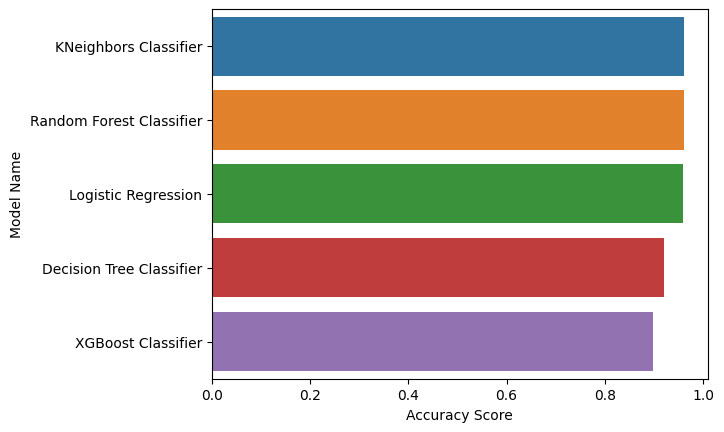

In [463]:
sns.barplot(x="Accuracy Score", y="Model Name", data=model_df)

In [409]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,80.0,0,1,1,0,105.92,32.500000,0,1,0,0,1,0,0
1,0,49.0,0,0,1,1,171.23,34.400000,2,1,0,0,1,0,0
2,0,79.0,1,0,1,0,174.12,24.000000,0,1,0,0,0,1,0
3,1,74.0,1,1,1,0,70.09,27.400000,0,1,0,0,1,0,0
4,0,69.0,0,0,0,1,94.39,22.800000,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2970,0,57.0,0,0,1,0,77.93,21.700000,0,0,0,0,1,0,0
2971,0,80.0,1,0,1,1,83.75,29.065758,0,0,0,0,1,0,0
2972,0,81.0,0,0,1,1,125.20,40.000000,0,0,0,0,0,1,0
2973,0,35.0,0,0,1,0,82.99,30.600000,0,0,0,0,0,1,0


In [292]:
importance = rfc.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.02929
Feature: 1, Score: 0.26198
Feature: 2, Score: 0.03174
Feature: 3, Score: 0.02111
Feature: 4, Score: 0.02477
Feature: 5, Score: 0.03360
Feature: 6, Score: 0.27427
Feature: 7, Score: 0.22200
Feature: 8, Score: 0.05242
Feature: 9, Score: 0.01213
Feature: 10, Score: 0.00002
Feature: 11, Score: 0.01709
Feature: 12, Score: 0.01945
Feature: 13, Score: 0.00013


In [467]:
df2 = df.drop(['work_type_Never_worked'], axis=1)
df2 = df2.drop(['work_type_children'], axis=1)
df2 = df2.drop(['work_type_Private'], axis=1)
df2 = df2.drop(['work_type_Self-employed'], axis=1)
df2 = df2.drop(['work_type_Govt_job'], axis=1)

In [468]:
df2

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,31112,1,80.0,0,1,1,0,105.92,32.500000,0,1
1,60182,0,49.0,0,0,1,1,171.23,34.400000,2,1
2,1665,0,79.0,1,0,1,0,174.12,24.000000,0,1
3,53882,1,74.0,1,1,1,0,70.09,27.400000,0,1
4,10434,0,69.0,0,0,0,1,94.39,22.800000,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2970,45010,0,57.0,0,0,1,0,77.93,21.700000,0,0
2971,18234,0,80.0,1,0,1,1,83.75,29.065758,0,0
2972,44873,0,81.0,0,0,1,1,125.20,40.000000,0,0
2973,19723,0,35.0,0,0,1,0,82.99,30.600000,0,0


In [469]:
model_df2 = pd.DataFrame(columns=["Model Name","Accuracy Score"])

In [470]:
X2 = df2.drop("stroke", axis=1)
y2 = df2["stroke"]

In [471]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state = 42)

In [472]:
dtc2 = DecisionTreeClassifier()
dtc2.fit(X2_train, y2_train)
predictions_dtc2 = dtc2.predict(X2_test)
score = accuracy_score(y2_test, predictions_dtc2)
print(score)
new_row = {"Model Name":"Decision Tree Classifier", "Accuracy Score":score}
model_df2 = model_df2.append(new_row, ignore_index=True)

0.9164969450101833


/var/folders/t1/4gyh066d73q_htktlzfyfhrr0000gn/T/ipykernel_10285/222123467.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_df2 = model_df2.append(new_row, ignore_index=True)


In [473]:
rfc2 = RandomForestClassifier()
rfc2.fit(X2_train, y2_train)
predictions_rfc2 = rfc2.predict(X2_test)
score = accuracy_score(y2_test, predictions_rfc2)
print(score)
new_row = {"Model Name":"Random Forest Classifier", "Accuracy Score":score}
model_df2 = model_df2.append(new_row, ignore_index=True)

0.9592668024439919


/var/folders/t1/4gyh066d73q_htktlzfyfhrr0000gn/T/ipykernel_10285/4241384001.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_df2 = model_df2.append(new_row, ignore_index=True)


In [474]:
knc2 = KNeighborsClassifier()
knc2.fit(X2_train, y2_train)
predictions_knc2 = knc2.predict(X2_test)
score = accuracy_score(y2_test, predictions_knc2)
print(score)
new_row = {"Model Name":"KNeighbors Classifier", "Accuracy Score":score}
model_df2 = model_df2.append(new_row, ignore_index=True)

0.9613034623217923


/var/folders/t1/4gyh066d73q_htktlzfyfhrr0000gn/T/ipykernel_10285/3142189827.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_df2 = model_df2.append(new_row, ignore_index=True)


In [475]:
df_model2 = model_df2.sort_values("Accuracy Score", ascending=False)
df_model2.drop_duplicates(subset ="Model Name", keep = 'first', inplace = True)
df_model2.reset_index(drop=True, inplace=True)
df_model2

,Model Name,Accuracy Score
0,KNeighbors Classifier,0.961303
1,Random Forest Classifier,0.959267
2,Decision Tree Classifier,0.916497


In [476]:
new_row = {"Model Name":"XGBoost Classifier", "Accuracy Score":0.895484}
model_df2 = model_df2.append(new_row, ignore_index=True)

/var/folders/t1/4gyh066d73q_htktlzfyfhrr0000gn/T/ipykernel_10285/2110144269.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_df2 = model_df2.append(new_row, ignore_index=True)


In [477]:
model_df2.sort_values("Accuracy Score", ascending=False)


,Model Name,Accuracy Score
2,KNeighbors Classifier,0.961303
1,Random Forest Classifier,0.959267
0,Decision Tree Classifier,0.916497
3,XGBoost Classifier,0.895484


In [478]:
lr2 = LogisticRegression()
lr2.fit(X2_train, y2_train)
predictions_lr2 = lr2.predict(X2_test)
score = accuracy_score(y2_test, predictions_lr2)
print(score)

0.9592668024439919


In [480]:
new_row = {"Model Name":"Logistic Regression", "Accuracy Score":score}
model_df2 = model_df2.append(new_row, ignore_index=True)


/var/folders/t1/4gyh066d73q_htktlzfyfhrr0000gn/T/ipykernel_10285/3505362842.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_df2 = model_df2.append(new_row, ignore_index=True)


In [481]:
model_df2 = model_df2.sort_values("Accuracy Score", ascending=False)
model_df2

,Model Name,Accuracy Score
2,KNeighbors Classifier,0.961303
1,Random Forest Classifier,0.959267
4,Logistic Regression,0.959267
0,Decision Tree Classifier,0.916497
3,XGBoost Classifier,0.895484


<AxesSubplot: xlabel='Accuracy Score', ylabel='Model Name'>

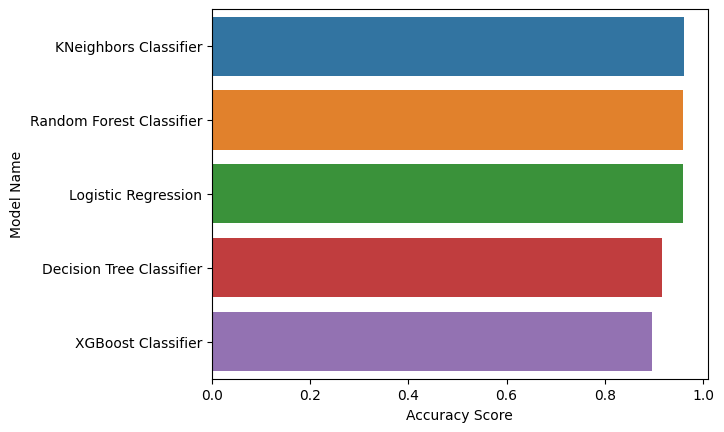

In [482]:
sns.barplot(x="Accuracy Score", y="Model Name", data=model_df2)

In [313]:
df2

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,80.0,0,1,1,0,105.92,32.500000,0,1
1,0,49.0,0,0,1,1,171.23,34.400000,2,1
2,0,79.0,1,0,1,0,174.12,24.000000,0,1
3,1,74.0,1,1,1,0,70.09,27.400000,0,1
4,0,69.0,0,0,0,1,94.39,22.800000,0,1
...,...,...,...,...,...,...,...,...,...,...
2970,0,57.0,0,0,1,0,77.93,21.700000,0,0
2971,0,80.0,1,0,1,1,83.75,29.065758,0,0
2972,0,81.0,0,0,1,1,125.20,40.000000,0,0
2973,0,35.0,0,0,1,0,82.99,30.600000,0,0


In [314]:
df['avg_glucose_level'].mean()

91.76224873949582

In [316]:
gender = int(input('Please input your gender (1 for male, 0 for female): '))
age = int(input('Please enter your age: '))
hypertension = int(input('Do you have hypertension? (1 for yes, 0 for no): '))
heart_disease = int(input('Do you have heart disease? (1 for yes, 0 for no): '))
ever_married = int(input('Are you married? (1 for yes, 0 for no): '))
residence_type = int(input('Do you live in a urban area? (1 for yes, 0 for no): '))
avg_glucose_level = float(input('Please enter your average glucose level: '))
bmi = float(input('Please enter your BMI: '))
smoking_status = int(input('Please enter your smoking status (0 for never smoked, 1 for formerly smoked, 2 for smokes): '))

data = (gender, age, hypertension, heart_disease, ever_married, residence_type, avg_glucose_level, bmi, smoking_status)
data = np.asarray(data)
data = data.reshape(1, -1)
prediction = knc2.predict(data)
if prediction == 1:
    print('You have a high chance of getting a stroke.')
else:
    print('You have a low chance of getting a stroke.')


You have a low chance of getting a stroke.


/opt/homebrew/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [426]:
from sklearn.linear_model import LogisticRegression


In [489]:
lr = LogisticRegression()
lr.fit(X2_train, y2_train)
predictions_lr = lr.predict(X2_test)
score = accuracy_score(y2_test, predictions_lr)
print(score)

0.9592668024439919


In [495]:
model_df3 = pd.DataFrame(columns=["Model Name","Accuracy Score"])

In [490]:
df3 = df2.drop(['heart_disease'], axis=1)
df3

,id,gender,age,hypertension,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,31112,1,80.0,0,1,0,105.92,32.500000,0,1
1,60182,0,49.0,0,1,1,171.23,34.400000,2,1
2,1665,0,79.0,1,1,0,174.12,24.000000,0,1
3,53882,1,74.0,1,1,0,70.09,27.400000,0,1
4,10434,0,69.0,0,0,1,94.39,22.800000,0,1
...,...,...,...,...,...,...,...,...,...,...
2970,45010,0,57.0,0,1,0,77.93,21.700000,0,0
2971,18234,0,80.0,1,1,1,83.75,29.065758,0,0
2972,44873,0,81.0,0,1,1,125.20,40.000000,0,0
2973,19723,0,35.0,0,1,0,82.99,30.600000,0,0


In [491]:
X3 = df3.drop("stroke", axis=1)
y3 = df3["stroke"]

In [492]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.33, random_state = 42)

In [493]:
dtc3 = DecisionTreeClassifier()
dtc3.fit(X3_train, y3_train)
predictions_dtc3 = dtc3.predict(X3_test)
score = accuracy_score(y3_test, predictions_dtc3)
print(score)

0.924643584521385


In [496]:
new_row = {"Model Name":"Decision Tree Classifier", "Accuracy Score":score}
model_df3 = model_df3.append(new_row, ignore_index=True)

/var/folders/t1/4gyh066d73q_htktlzfyfhrr0000gn/T/ipykernel_10285/540827483.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_df3 = model_df3.append(new_row, ignore_index=True)


In [497]:
rtc3 = RandomForestClassifier()
rtc3.fit(X3_train, y3_train)
predictions_rtc3 = rtc3.predict(X3_test)
score = accuracy_score(y3_test, predictions_rtc3)  
print(score)

0.960285132382892


In [498]:
new_row = {"Model Name":"Random Forest Classifier", "Accuracy Score":score}
model_df3 = model_df3.append(new_row, ignore_index=True)

/var/folders/t1/4gyh066d73q_htktlzfyfhrr0000gn/T/ipykernel_10285/2740821369.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_df3 = model_df3.append(new_row, ignore_index=True)


In [499]:
knc3 = KNeighborsClassifier()
knc3.fit(X3_train, y3_train)
predictions_knc3 = knc3.predict(X3_test)
score = accuracy_score(y3_test, predictions_knc3)
print(score)

0.9613034623217923


In [500]:
new_row = {"Model Name":"KNeighbors Classifier", "Accuracy Score":score}
model_df3 = model_df3.append(new_row, ignore_index=True)

/var/folders/t1/4gyh066d73q_htktlzfyfhrr0000gn/T/ipykernel_10285/1125311439.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_df3 = model_df3.append(new_row, ignore_index=True)


In [501]:
lr3 = LogisticRegression()
lr3.fit(X3_train, y3_train)
predictions_lr3 = lr3.predict(X3_test)
score = accuracy_score(y3_test, predictions_lr3)
print(score)

0.9592668024439919


In [502]:
new_row = {"Model Name":"Logistic Regression", "Accuracy Score":score}
model_df3 = model_df3.append(new_row, ignore_index=True)

/var/folders/t1/4gyh066d73q_htktlzfyfhrr0000gn/T/ipykernel_10285/672787874.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_df3 = model_df3.append(new_row, ignore_index=True)


In [503]:
model_df3 = model_df3.sort_values("Accuracy Score", ascending=False)
model_df3

,Model Name,Accuracy Score
2,KNeighbors Classifier,0.961303
1,Random Forest Classifier,0.960285
3,Logistic Regression,0.959267
0,Decision Tree Classifier,0.924644


<AxesSubplot: xlabel='Accuracy Score', ylabel='Model Name'>

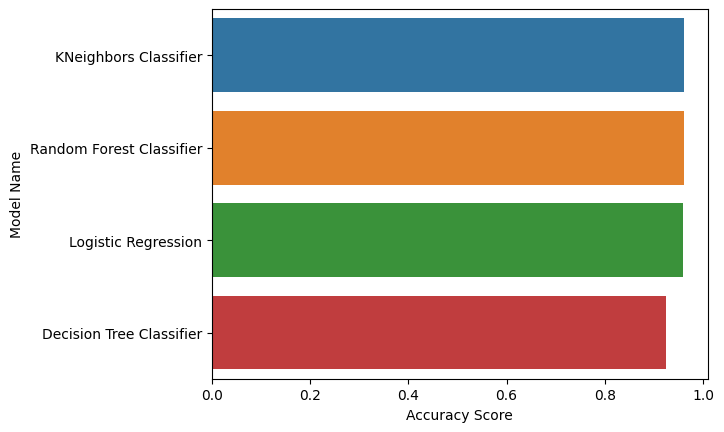

In [504]:
sns.barplot(x="Accuracy Score", y="Model Name", data=model_df3)